<a href="https://colab.research.google.com/github/sauravkokane/Data-Science-Training/blob/master/Bias_and_Variance_Tradeoff.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
X = np.linspace(0, 2, 1000)
y = -np.sin(np.pi * X)
X.shape, y.shape

((1000,), (1000,))

In [3]:
def create_samples(num_samples):
    samples = []
    for _ in range(num_samples):
        samples.append([np.random.uniform(0, 2), np.random.uniform(0, 2)])
    samples = np.array(samples)
    targets = -np.sin(np.pi * samples)
    return samples, targets

# Example usage: Create 100 samples
samples, targets = create_samples(1000)

In [4]:
np.sin(np.pi * 0.25494014), np.sin(np.pi * 1.03221218)

(0.7179954146723816, -0.10102491006742473)

In [5]:
samples[-1], targets[-1]

(array([1.43438956, 0.50799057]), array([ 0.97883212, -0.99968493]))

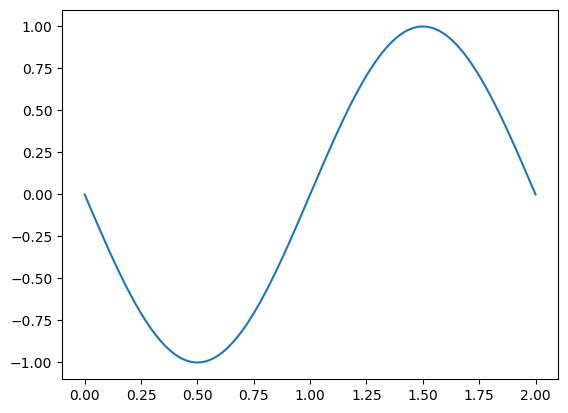

In [6]:
plt.plot(X, y)

In [7]:
from sklearn.linear_model import LinearRegression

In [8]:
best_linear_model = LinearRegression()
best_linear_model.fit(X.reshape(-1, 1), y)

LinearRegression()

In [9]:
y_pred_best = best_linear_model.predict(X.reshape(-1, 1))
y_pred_best.shape

(1000,)

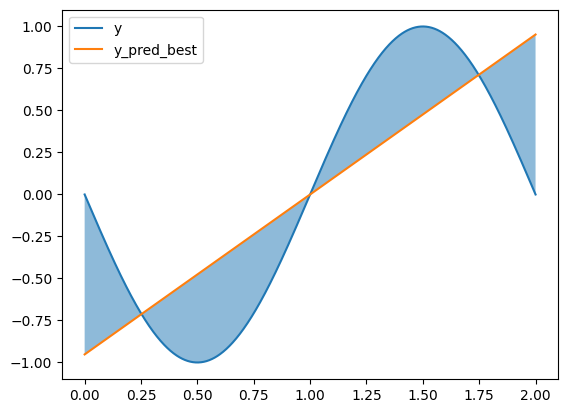

In [10]:
plt.plot(X, y)
plt.plot(X, y_pred_best)
# color area between y and y_pred_best
plt.fill_between(X, y, y_pred_best, alpha=0.5, label="bias")
plt.legend(['y', 'y_pred_best'])
plt.show()

In [11]:
def create_linear_regression_models(samples, targets):
    models = []
    for i in range(len(samples)):
        model = LinearRegression()
        # Reshape the sample to a 2D array for fitting
        model.fit(samples[i].reshape(-1, 1), np.array(targets[i]))
        models.append(model)
    return models

In [12]:
linear_regression_models = create_linear_regression_models(samples, targets)

In [13]:
predictions = []
for model in linear_regression_models:
    predictions.append(model.predict(X.reshape(-1, 1)))

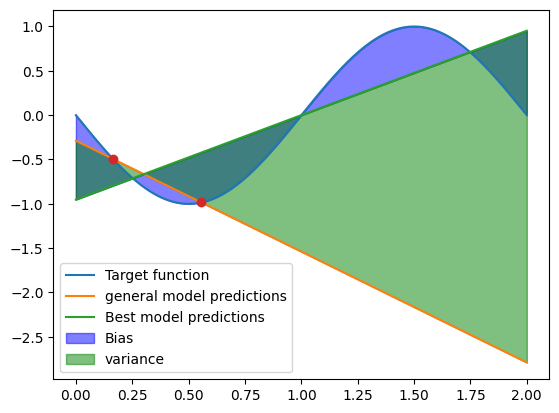

In [14]:
plt.plot(X, y, label="Target function")
plt.plot(X, predictions[0], label="general model predictions")
plt.plot(X, y_pred_best, label="Best model predictions")
plt.plot(samples[0], targets[0], 'o')
# color area between y and y_pred_best and annotate it with bias
plt.fill_between(X, y, y_pred_best, alpha=0.5, label="Bias", color="blue")
plt.fill_between(X, y_pred_best, predictions[0], alpha=0.5, label="variance", color="green")
plt.legend()
plt.show()

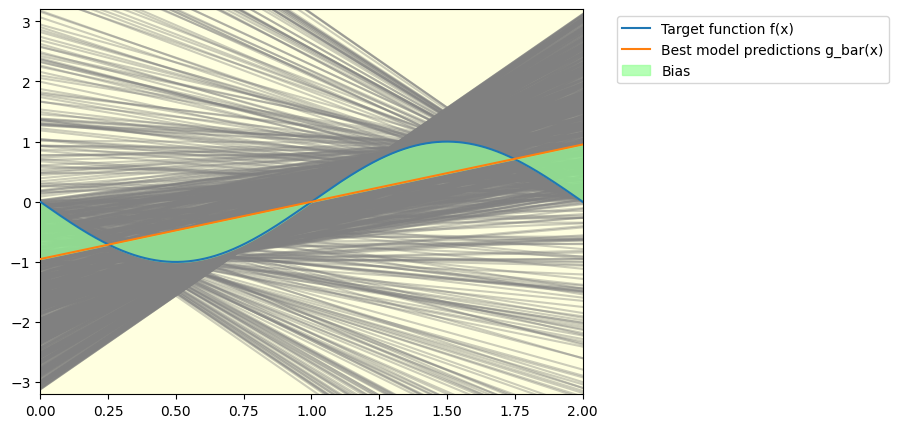

In [15]:
plt.rcParams['figure.figsize'] = [7, 5]
for prediction in predictions:
    plt.plot(X, prediction, color="gray", alpha=0.4, zorder=1)

plt.plot(X, y, label="Target function f(x)", zorder=3)
plt.plot(X, y_pred_best, label="Best model predictions g_bar(x)",zorder=3)
plt.fill_between(X, y, y_pred_best, alpha=0.7, label="Bias", color="#98FF98", zorder=2)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
ax = plt.gca()
ax.set_facecolor('#FFFFE0')
plt.xlim(0, 2)
plt.ylim(-3.2, 3.2)
plt.show()

In [16]:
def calculate_bias_variance(X, y, predictions, best_model_predictions):
    """Calculates the bias and variance of the model predictions."""

    # Calculate bias
    bias = np.mean((y - best_model_predictions)**2)

    # Calculate variance
    variance = np.mean(np.mean((predictions - best_model_predictions)**2, axis=0))

    return bias, variance

# Example usage:
bias, variance = calculate_bias_variance(X, y, np.array(predictions), y_pred_best)
print(f"Bias: {bias}")
print(f"Variance: {variance}")

Bias: 0.19675217396313943
Variance: 1.609782373136178
